In [41]:
#!pip install scikit-learn
#!pip install pandas
#!pip install matplotlib
#!pip install numpy

In [42]:
import sklearn
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split #Data split
from sklearn.ensemble import GradientBoostingRegressor
import warnings
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import PredictionErrorDisplay

from sklearn.neural_network import MLPRegressor

In [43]:
file = pd.read_csv('train.csv')
file.drop(['Id'], axis = 1, inplace=True)
file.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Overview

In [44]:
print(file.info)
print(file.describe())

<bound method DataFrame.info of       MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0          

In [45]:
for elm in file:
    print(elm, file[elm].dtypes)

MSSubClass int64
MSZoning object
LotFrontage float64
LotArea int64
Street object
Alley object
LotShape object
LandContour object
Utilities object
LotConfig object
LandSlope object
Neighborhood object
Condition1 object
Condition2 object
BldgType object
HouseStyle object
OverallQual int64
OverallCond int64
YearBuilt int64
YearRemodAdd int64
RoofStyle object
RoofMatl object
Exterior1st object
Exterior2nd object
MasVnrType object
MasVnrArea float64
ExterQual object
ExterCond object
Foundation object
BsmtQual object
BsmtCond object
BsmtExposure object
BsmtFinType1 object
BsmtFinSF1 int64
BsmtFinType2 object
BsmtFinSF2 int64
BsmtUnfSF int64
TotalBsmtSF int64
Heating object
HeatingQC object
CentralAir object
Electrical object
1stFlrSF int64
2ndFlrSF int64
LowQualFinSF int64
GrLivArea int64
BsmtFullBath int64
BsmtHalfBath int64
FullBath int64
HalfBath int64
BedroomAbvGr int64
KitchenAbvGr int64
KitchenQual object
TotRmsAbvGrd int64
Functional object
Fireplaces int64
FireplaceQu object
GarageTy

In [46]:
for elm in file: 
    if file[elm].isnull().sum() != 0: 
        print(elm, file[elm].isnull().sum())


LotFrontage 259
Alley 1369
MasVnrType 872
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


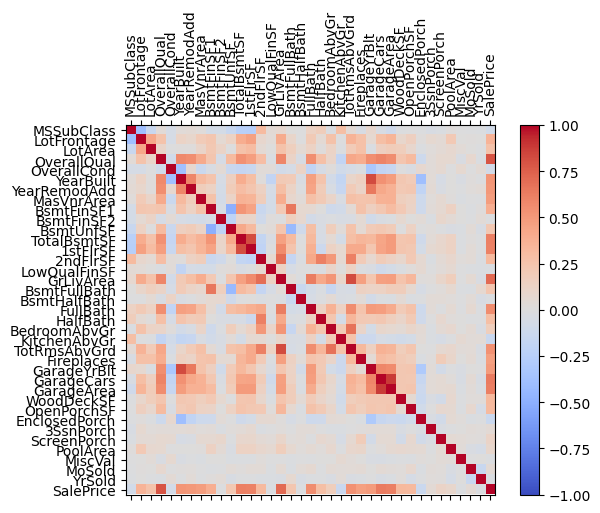

In [47]:
df_num = file.select_dtypes(include = ['float64', 'int64'])

corr = df_num.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_num.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_num.columns)
ax.set_yticklabels(df_num.columns)
plt.show()

We see that "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold", "KitchenAbvGr", "LowQualFinSF" Don't seem to have much corralation between any of the other fetures

The following plots all 79 columns:

C:\Users\alx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\plotting\_matplotlib\core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


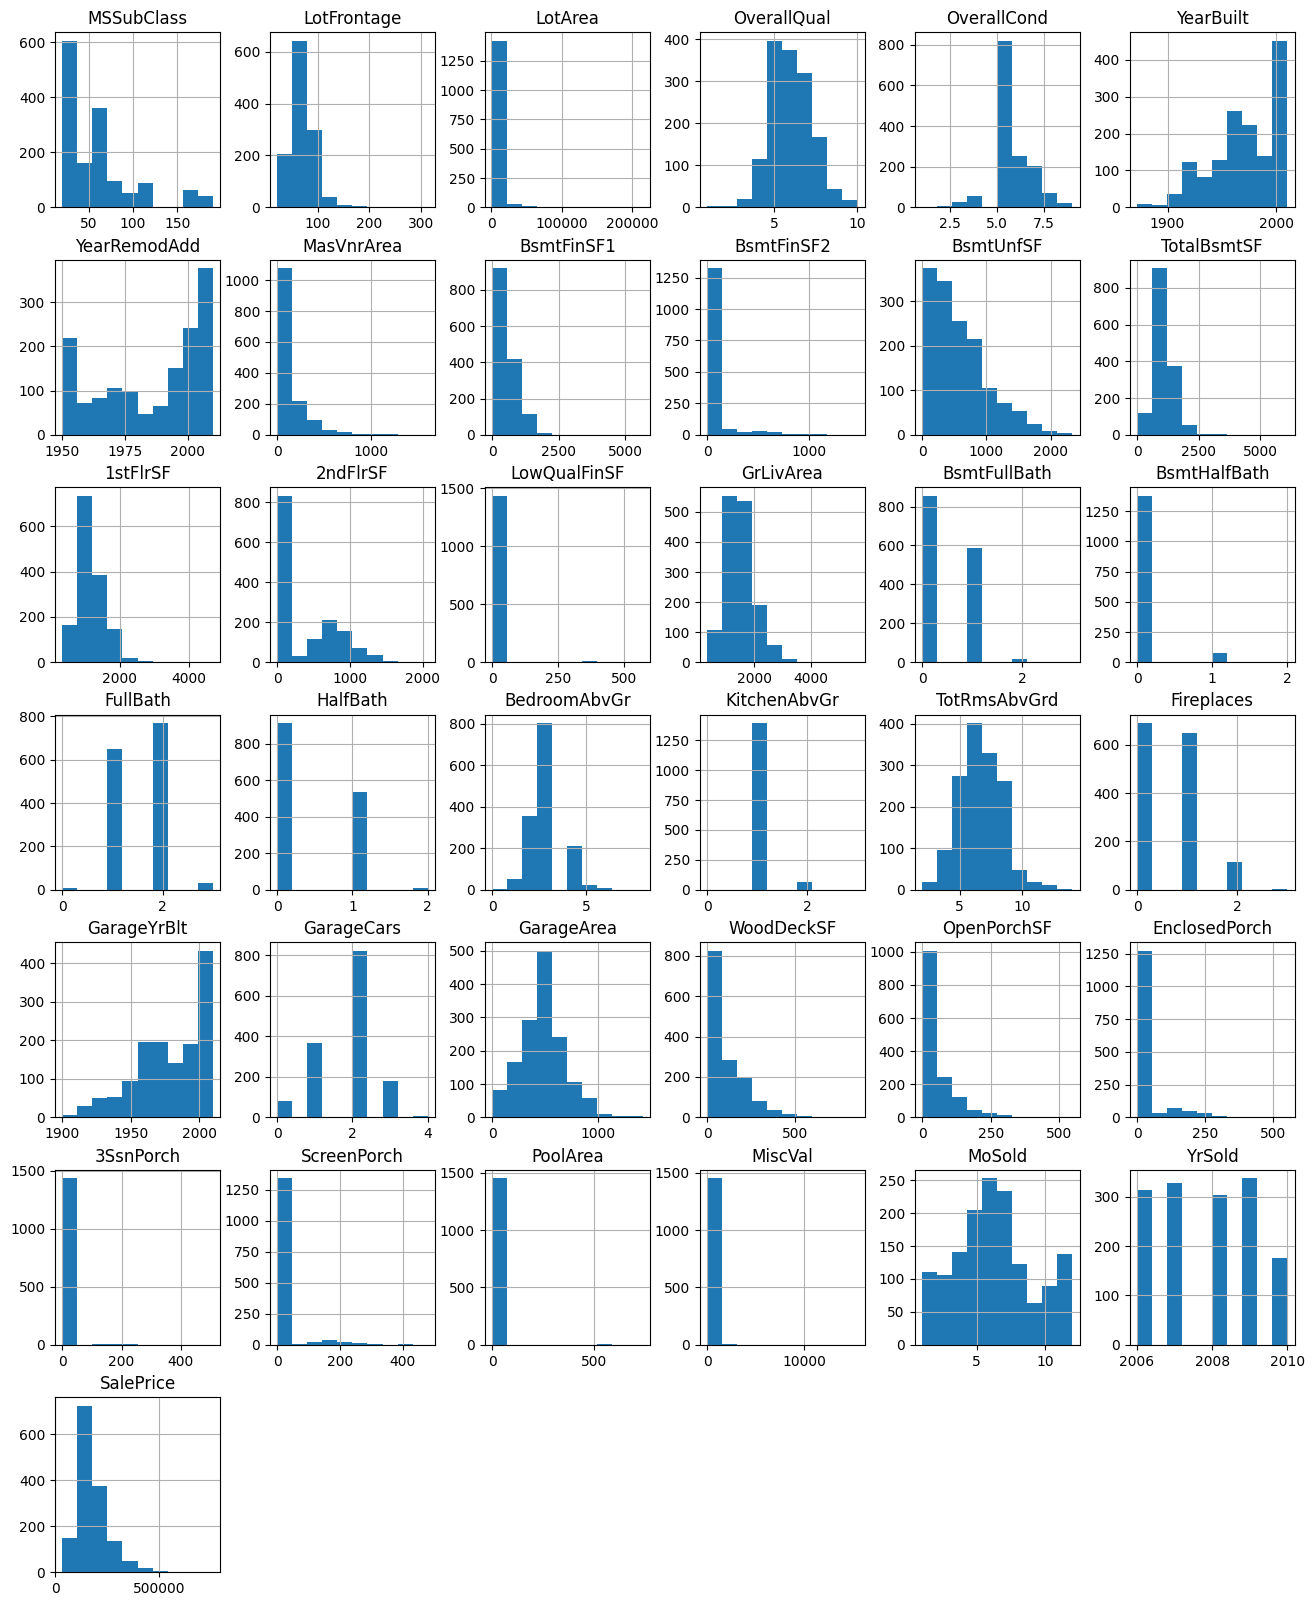

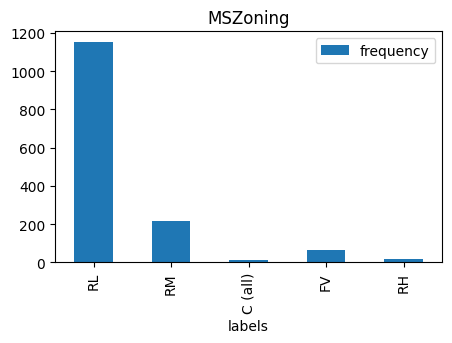

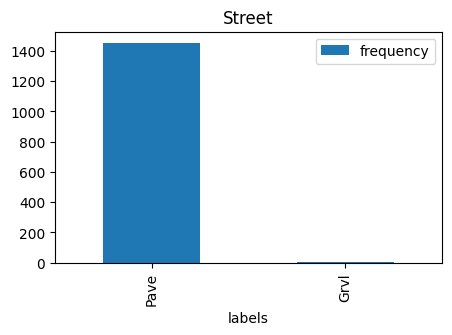

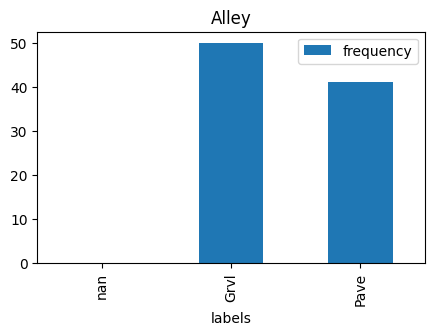

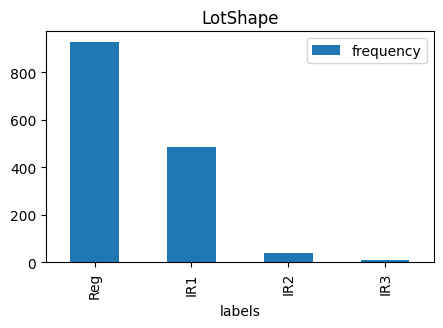

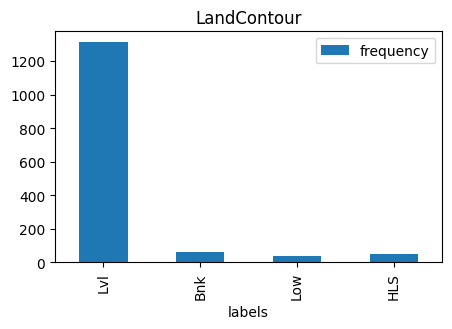

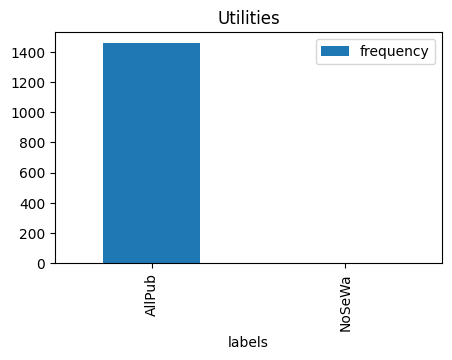

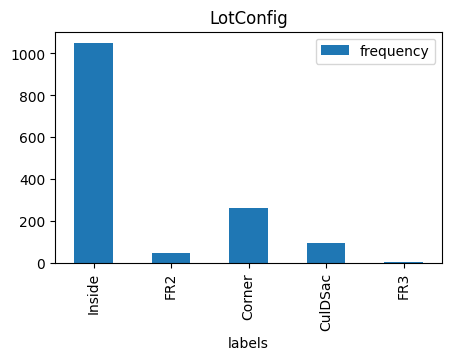

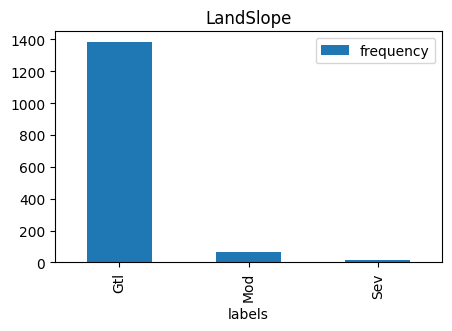

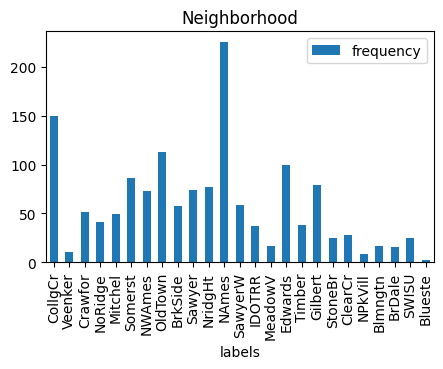

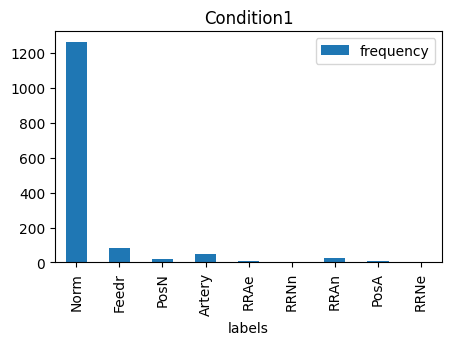

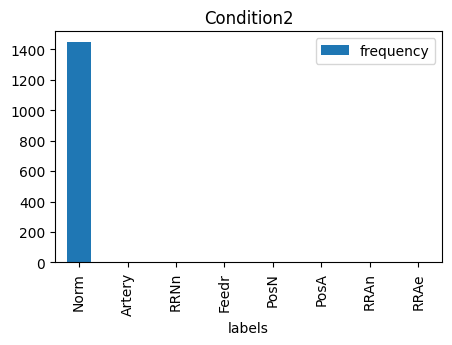

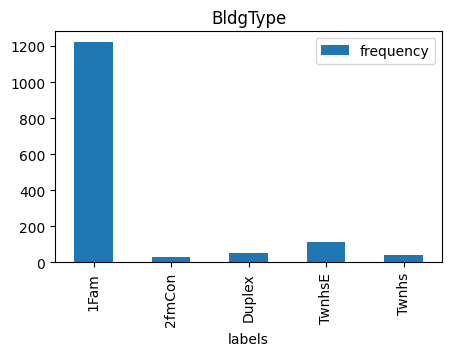

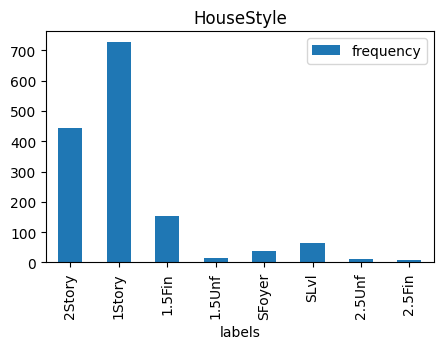

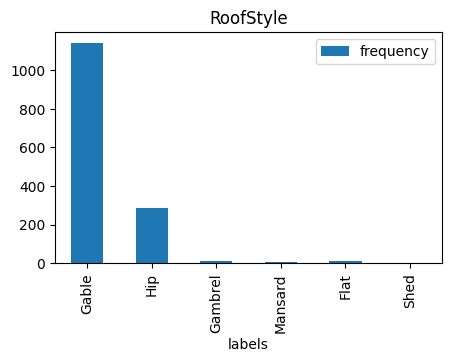

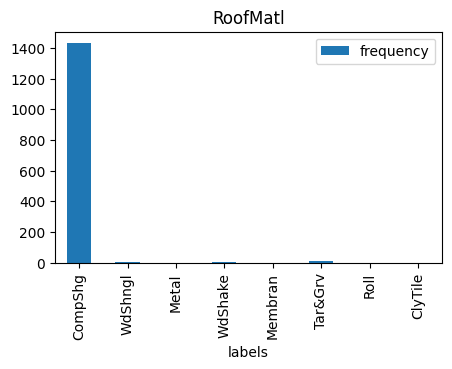

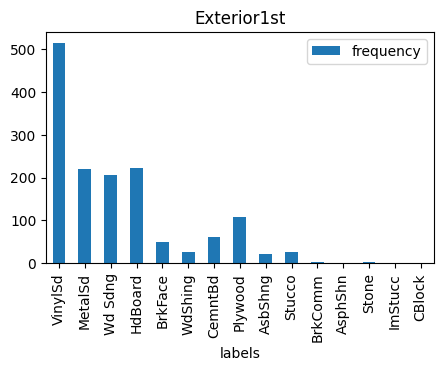

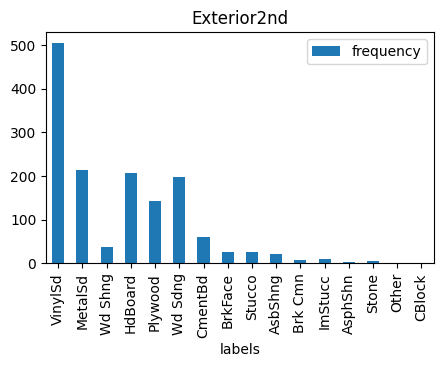

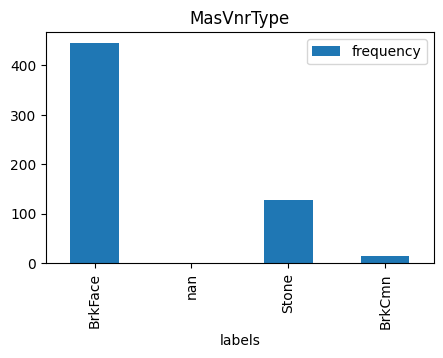

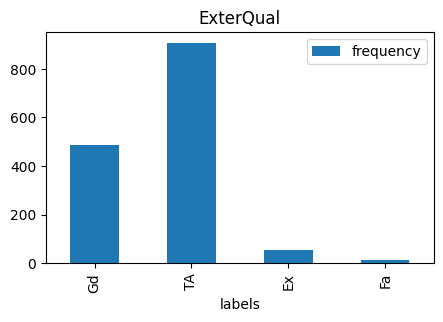

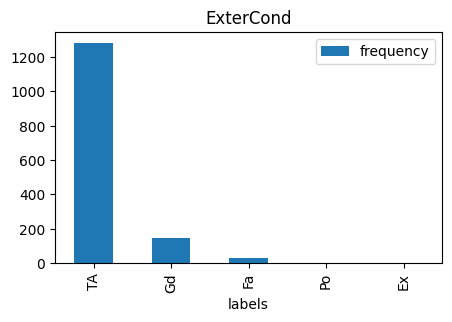

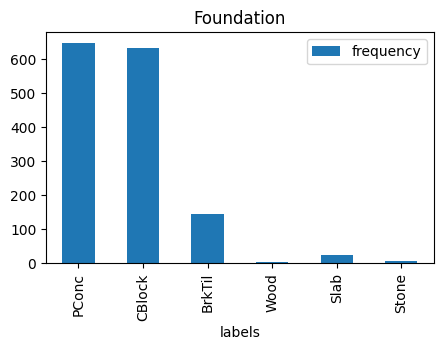

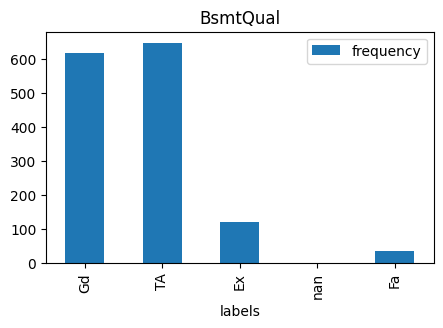

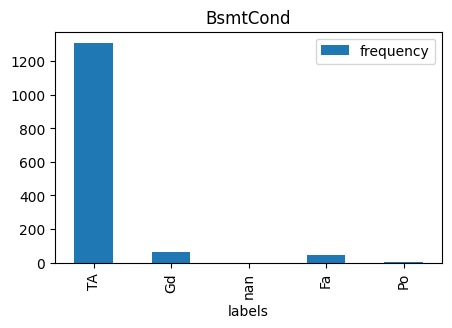

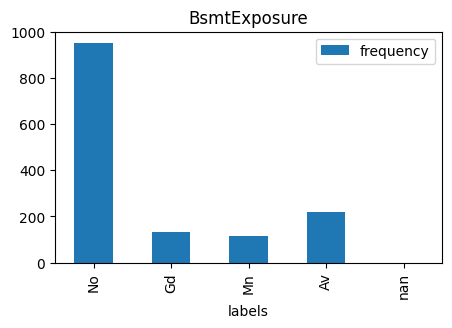

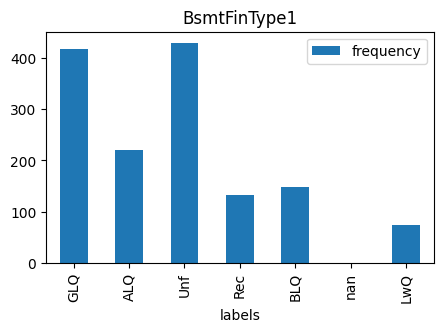

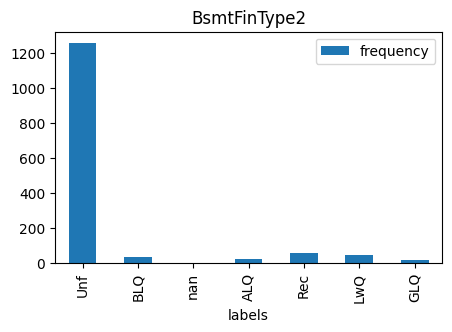

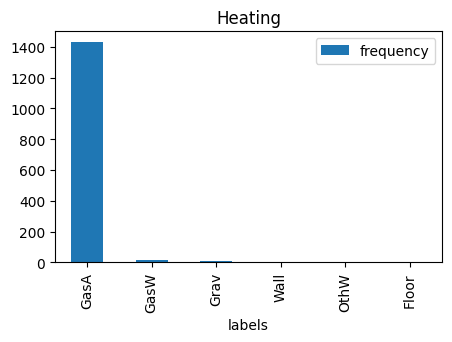

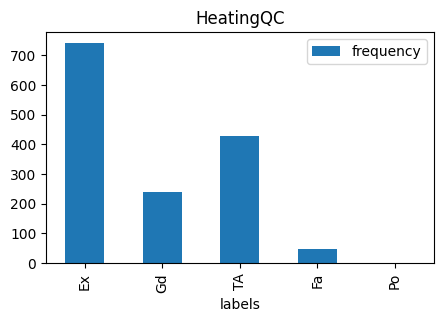

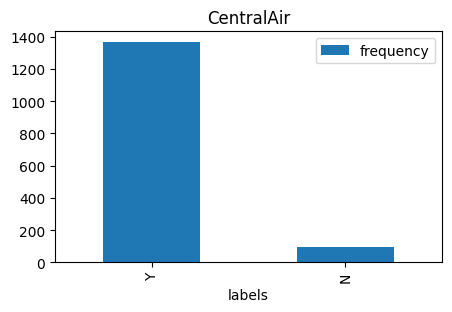

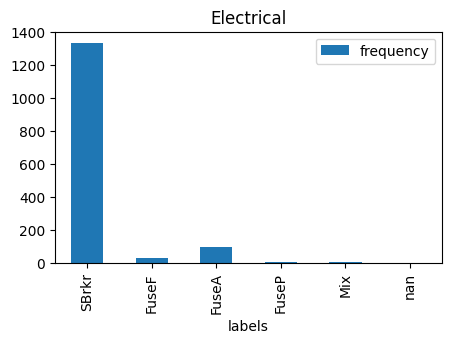

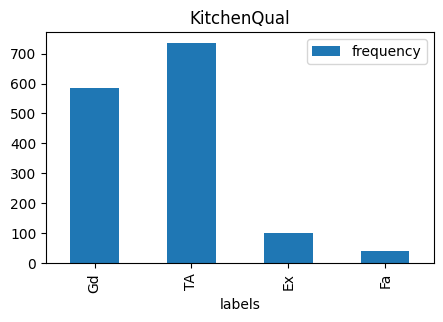

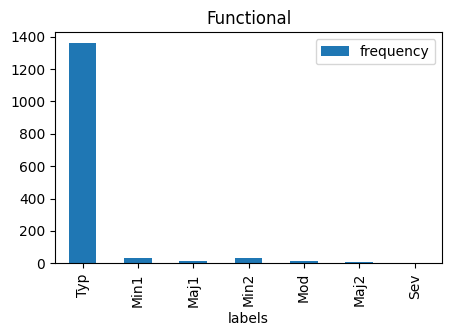

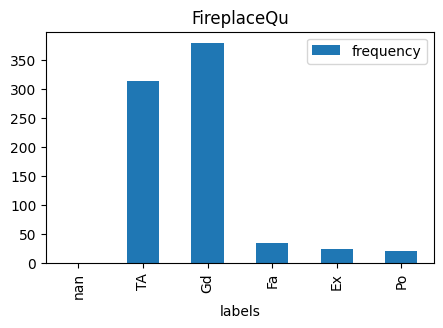

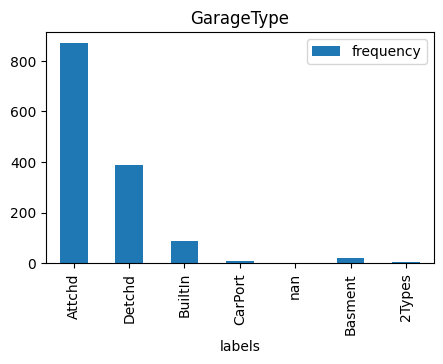

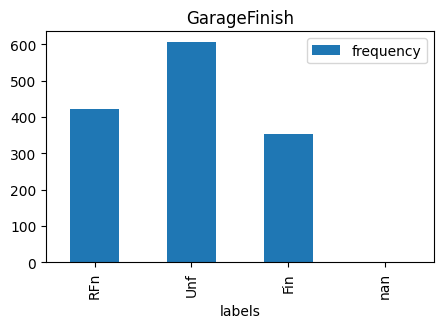

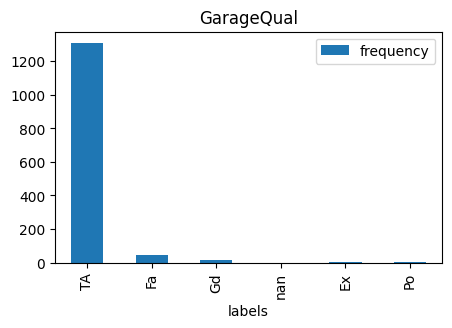

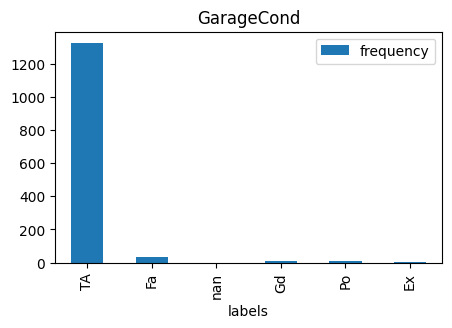

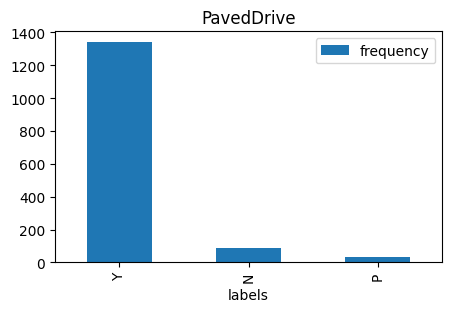

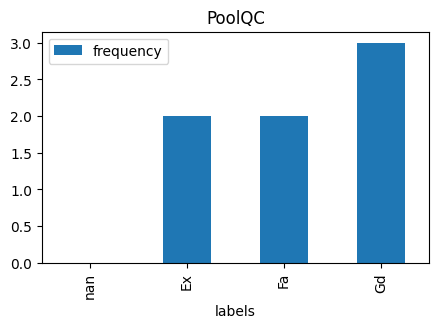

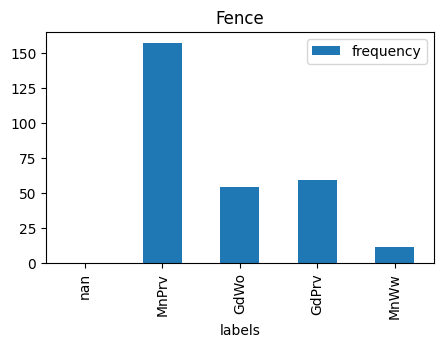

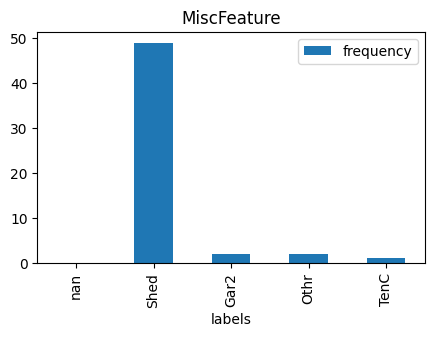

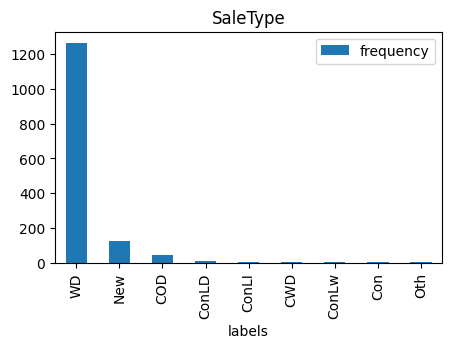

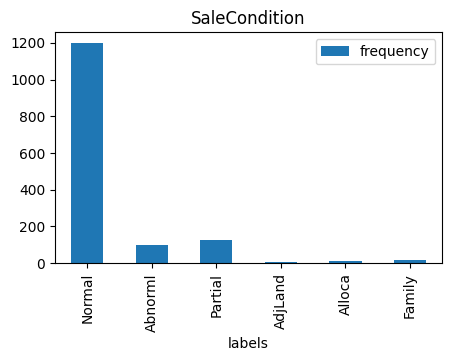

In [48]:
df_num.hist(figsize=(16, 20), bins=10)

'''(title, [(label_1,values_1) ... (label_k,values_k)])'''
def createObjectData():
    lst = []
    for elm in file:
        if file[elm].dtypes == object:
            dict = []
            for ob in (file[elm].unique()):
                dict.append((ob, len(file[file[elm] == ob])))
            lst.append((elm, dict))
    return lst

objectData = createObjectData()
for elm in objectData:
    df_obj = pd.DataFrame(elm[1], columns=['labels', 'frequency'])
    df_obj.plot(kind='bar', x='labels', figsize=(5, 3), title = elm[0])

# Preproccesing functions

In [49]:
#Drop sleceted columns
def drop(f):
    dropCol = ["EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold", "KitchenAbvGr", "LowQualFinSF"]
    for elm in dropCol:
        f.drop([elm], axis = 1, inplace=True)
    return f

In [50]:
#Replace the missing values
def replaceNa(f):
    f['LotFrontage'] = f['LotFrontage'].fillna(f['LotFrontage'].mean())
    f['MasVnrArea'] = f['MasVnrArea'].fillna(f['MasVnrArea'].mean())
    f['GarageYrBlt'] = f['GarageYrBlt'].fillna(f['GarageYrBlt'].mean())
    return f

#Convert datatypes
def convertData(f):
    f.astype({'MSSubClass': 'object'})
    f.astype({'BsmtHalfBath': 'object'})
    return f

In [51]:
#Log transformation
def logTransform(f):
    x = f.select_dtypes(include = ['float64', 'int64'])
    if 'SalePrice' in x:
        x.drop(['SalePrice'], axis = 1, inplace=True)
    for col in x:
        f[col] = np.log1p(f[col])
    return f

In [52]:
#Convert categorical data into dummy variables
def dummy(f):
    f = pd.get_dummies(f)
    return f

In [53]:
#Data scaling for nural network
def scale(f):
    scalerData = []
    x = f.select_dtypes(include = ['float64', 'int64'])
    if 'SalePrice' in x:
        x.drop(['SalePrice'], axis = 1, inplace=True)
    for col in x: scalerData.append(col)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(f[scalerData])
    f[scalerData] = scaler.transform(f[scalerData])
    return f

In [54]:
#Drop features with little to no importance
def drop1(f):
    dropCol = ["LotFrontage", "MasVnrArea", "TotRmsAbvGrd", "BedroomAbvGr", "MSSubClass", "FullBath", "BsmtFinSF2", "HalfBath", "BsmtHalfBath"]
    for elm in dropCol:
        f.drop([elm], axis = 1, inplace=True)
    return f

In [55]:
#Function calls for GradientBoostingRegressor
file = drop(file)
file = replaceNa(file)
file = convertData(file)
file = logTransform(file)
file['SalePrice'] = np.log1p(file['SalePrice'])
file = dummy(file)

In [56]:
#Function calls for Nural network
nFile = file.copy(deep=True)
nFile = drop1(nFile)
nFile = scale(nFile)

# Split data

In [57]:
train, test = train_test_split(file, test_size=0.2, shuffle=True, random_state = 42)
y_train, y_test = train['SalePrice'], test['SalePrice']
train.drop(['SalePrice'], axis = 1, inplace=True)
test.drop(['SalePrice'], axis = 1, inplace=True)

# Basic model

GradientBoostingRegressor is used because of the size of the datset, for larger samples HistGradientBoostingRegressor is better. 

In [58]:
modelC = GradientBoostingRegressor(random_state = 42, learning_rate = 0.1, n_estimators = 120, subsample = 0.8, criterion='squared_error', min_samples_leaf=3)
modelC.fit(train, y_train) 

pred = modelC.predict(test) 

<b> R-squared: </b> how much of the variation of a dependent variable is explained by an independent variable in a regression model. <br>
<b> Mean squared error: </b> The average squared difference between the estimated values and the actual value. <br>
<b> Mean Absolute error Loss: </b> Calculates the absolute difference between the current output and the expected output divided by the number of output. <br>
<b> Median Absolute error Loss: </b> The same as above, but median of squares of errors between labeled data and predicted data. <br>
<b> Max error: </b> Worst prediction <br>

In [59]:
print("R-squared            :", round(r2_score(y_test, pred), 4))
print("Mean squared error   :", round(mean_squared_error(y_test, pred), 4))
print("Mean Absolute error  :", round(mean_absolute_error(y_test, pred), 4))
print("Median Absolute error:", round(median_absolute_error(y_test, pred), 4))
print("Max error            :", round(max_error(y_test, pred), 4))

R-squared            : 0.91
Mean squared error   : 0.0168
Mean Absolute error  : 0.0905
Median Absolute error: 0.0671
Max error            : 0.7181


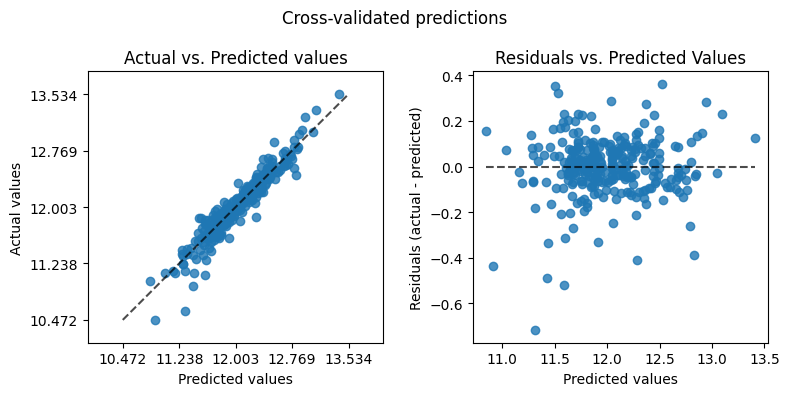

In [60]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=pred,
    kind="actual_vs_predicted",
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=pred,
    kind="residual_vs_predicted",
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Cross-validated predictions")
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Features importance'}, xlabel='Importance', ylabel='Features'>

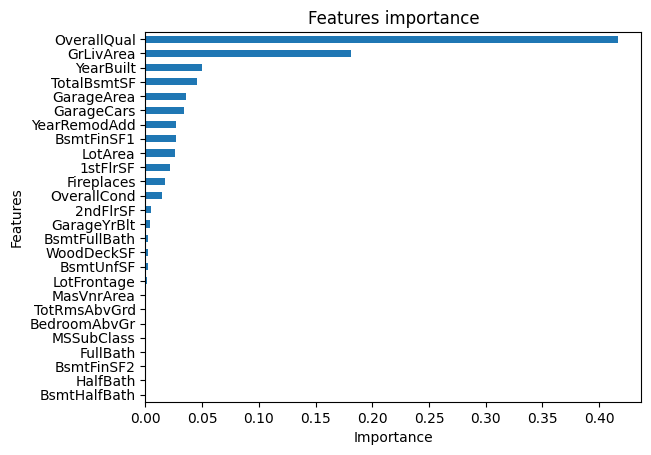

In [61]:
feature_importance = modelC.feature_importances_
colList = []
for col in train: colList.append(col)
feature_importance = modelC.feature_importances_
y, x = colList[:26], feature_importance[:26]
df = pd.DataFrame(list(zip(y,x)), columns=['x', 'y'])
df = df.sort_values(by='y')
df.plot(kind = 'barh',
        x='x',
        y='y',
        title="Features importance",
        xlabel="Importance",
        ylabel="Features",
        legend=None)

The following features don't seem to impact the model much / at all:
["LotFrontage", "MasVnrArea", "TotRmsAbvGrd", "BedroomAbvGr", "MSSubClass", "FullBath", "BsmtFinSF2", "HalfBath", "BsmtHalfBath"]

# Advanced model

In [62]:
trainB, testB = train_test_split(nFile, test_size=0.2, shuffle=True, random_state = 42)
y_trainB, y_testB = trainB['SalePrice'], testB['SalePrice']
trainB.drop(['SalePrice'], axis = 1, inplace=True)
testB.drop(['SalePrice'], axis = 1, inplace=True)

In [63]:
modelB = GradientBoostingRegressor(random_state = 42, learning_rate = 0.1, n_estimators = 120, subsample = 0.8, criterion='squared_error', min_samples_leaf=3)
modelB.fit(trainB, y_trainB) 

predB = modelB.predict(testB) 

In [64]:
print("R-squared            :", round(r2_score(y_testB, predB), 4))
print("Mean squared error   :", round(mean_squared_error(y_testB, predB), 4))
print("Mean Absolute error  :", round(mean_absolute_error(y_testB, predB), 4))
print("Median Absolute error:", round(median_absolute_error(y_testB, predB), 4))
print("Max error            :", round(max_error(y_testB, predB), 4))

R-squared            : 0.9162
Mean squared error   : 0.0156
Mean Absolute error  : 0.0894
Median Absolute error: 0.0673
Max error            : 0.6485


R-squared            : 0.8994
Mean squared error   : 0.0188
Mean Absolute error  : 0.0909
Median Absolute error: 0.0619
Max error            : 0.7036

GB: R-squared            : 0.9162
Mean squared error   : 0.0156
Mean Absolute error  : 0.0894
Median Absolute error: 0.0673
Max error            : 0.6485

# Submission

In [68]:
def prepTest(f):
    f = drop(f)
    f = replaceNa(f)
    f = convertData(f)
    f = logTransform(f)
    f = scale(f)
    f = dummy(f)
    f = drop1(f)
    f = scale(f)


    f = f.reindex(columns = trainB.columns, fill_value=0)
    f.fillna(2)
    f.head()

    for col in f:
        nullCount = f[col].isnull().sum()
        if nullCount != 0:
            f[col].fillna(value = 0, inplace = True)
    return f

In [69]:
test_data = pd.read_csv('test.csv')
id = test_data.pop('Id')
test_data = prepTest(test_data)


test_pred = modelB.predict(test_data) 
test_pred = np.expm1(test_pred) 
output = pd.DataFrame({'Id':id, 'SalePrice': test_pred}) 
output.to_csv('submission.csv', index = False) 


   MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0           0            0  0.566300     0.644443     0.778385   0.633794   
1           0            0  0.622472     0.734867     0.778385   0.611077   
2           0            0  0.613950     0.644443     0.682606   0.903720   
3           0            0  0.524520     0.734867     0.778385   0.911149   
4           0            0  0.335525     0.882287     0.682606   0.866523   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0      0.185615           0    0.741323           0  ...           False   
1      0.135096           0    0.823054           0  ...           False   
2      0.802409           0    0.804475           0  ...           False   
3      0.802409           0    0.771613           0  ...           False   
4      0.703168           0    0.672061           0  ...           False   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0         F

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- BedroomAbvGr
- BsmtFinSF2
- BsmtHalfBath
- FullBath
- HalfBath
- ...
